## Homework 6
### Olivia Cooper
### Computational Astrophysics, Spring 2022

In [105]:
# the basics

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import astropy
from astropy.table import Table, SortedArray
import astropy.units as u
import astropy.constants as cns
import h5py
plt.style.use('../cooper-paper.mplstyle')

### Problem 2: Testing, testing, 1, 2, 3...

The fastest way to get up to speed with a code is to run already existing problem setups, i.e., test problems. It is also generally a good idea to run test problems to make sure the code is behaving as expected. Run the following test problems and make plots of the results (see documentation, the initial condition files are located here: http://www.tapir.caltech. edu/~phopkins/sims/). If the problem has a given analytic or expected numerical result, comment on how the code performs. Record how many processors you used for the test.

For each test, make a plot of the gas density versus position at a few different times (see notes on reading and plotting snapshots below).

a) *Sod Shock Tube.* See left panels in Fig 10 in Hopkins 2015. Compare against the expected analytic solution (the predicted solution is available as a text file). Discuss any features you see in the result.

Phil provides two different initial configuration files – one in which the cells have fixed mass and one in which the cells have fixed volume (you can check this for yourself by opening the ics hdf5 files and inspecting the ’Masses’ and ’Coordinates’ fields). Note that you can run this problem in either the meshless finite mass (MFM) or meshless finite volume (MFV) mode (as set in the GIZMO Config.sh file). GIZMO MFM will run the fixed-volume ics file .... but it doesn’t look as nice.

Here I use the MFM method with 4 processors on 1 node.

In [43]:
f0 = h5py.File('shocktube/snapshot_000.hdf5', 'r')
f5 = h5py.File('shocktube/snapshot_005.hdf5', 'r')
f9 = h5py.File('shocktube/snapshot_009.hdf5', 'r')
exact = Table.read('shocktube_exact.txt',format='ascii',names=('x','density','pressure','entropy','x_velocity'))

In [44]:
partdata = f0['PartType0']
for name in partdata:
    print(name)

Coordinates
Density
InternalEnergy
Masses
ParticleChildIDsNumber
ParticleIDGenerationNumber
ParticleIDs
SmoothingLength
Velocities


In [45]:
rho0 = f0['PartType0']['Density'][:]; rho5 = f5['PartType0']['Density'][:]; rho9 = f9['PartType0']['Density'][:]
x0 = f0['PartType0']['Coordinates'][:]; x5 = f5['PartType0']['Coordinates'][:]; x9 = f9['PartType0']['Coordinates'][:]

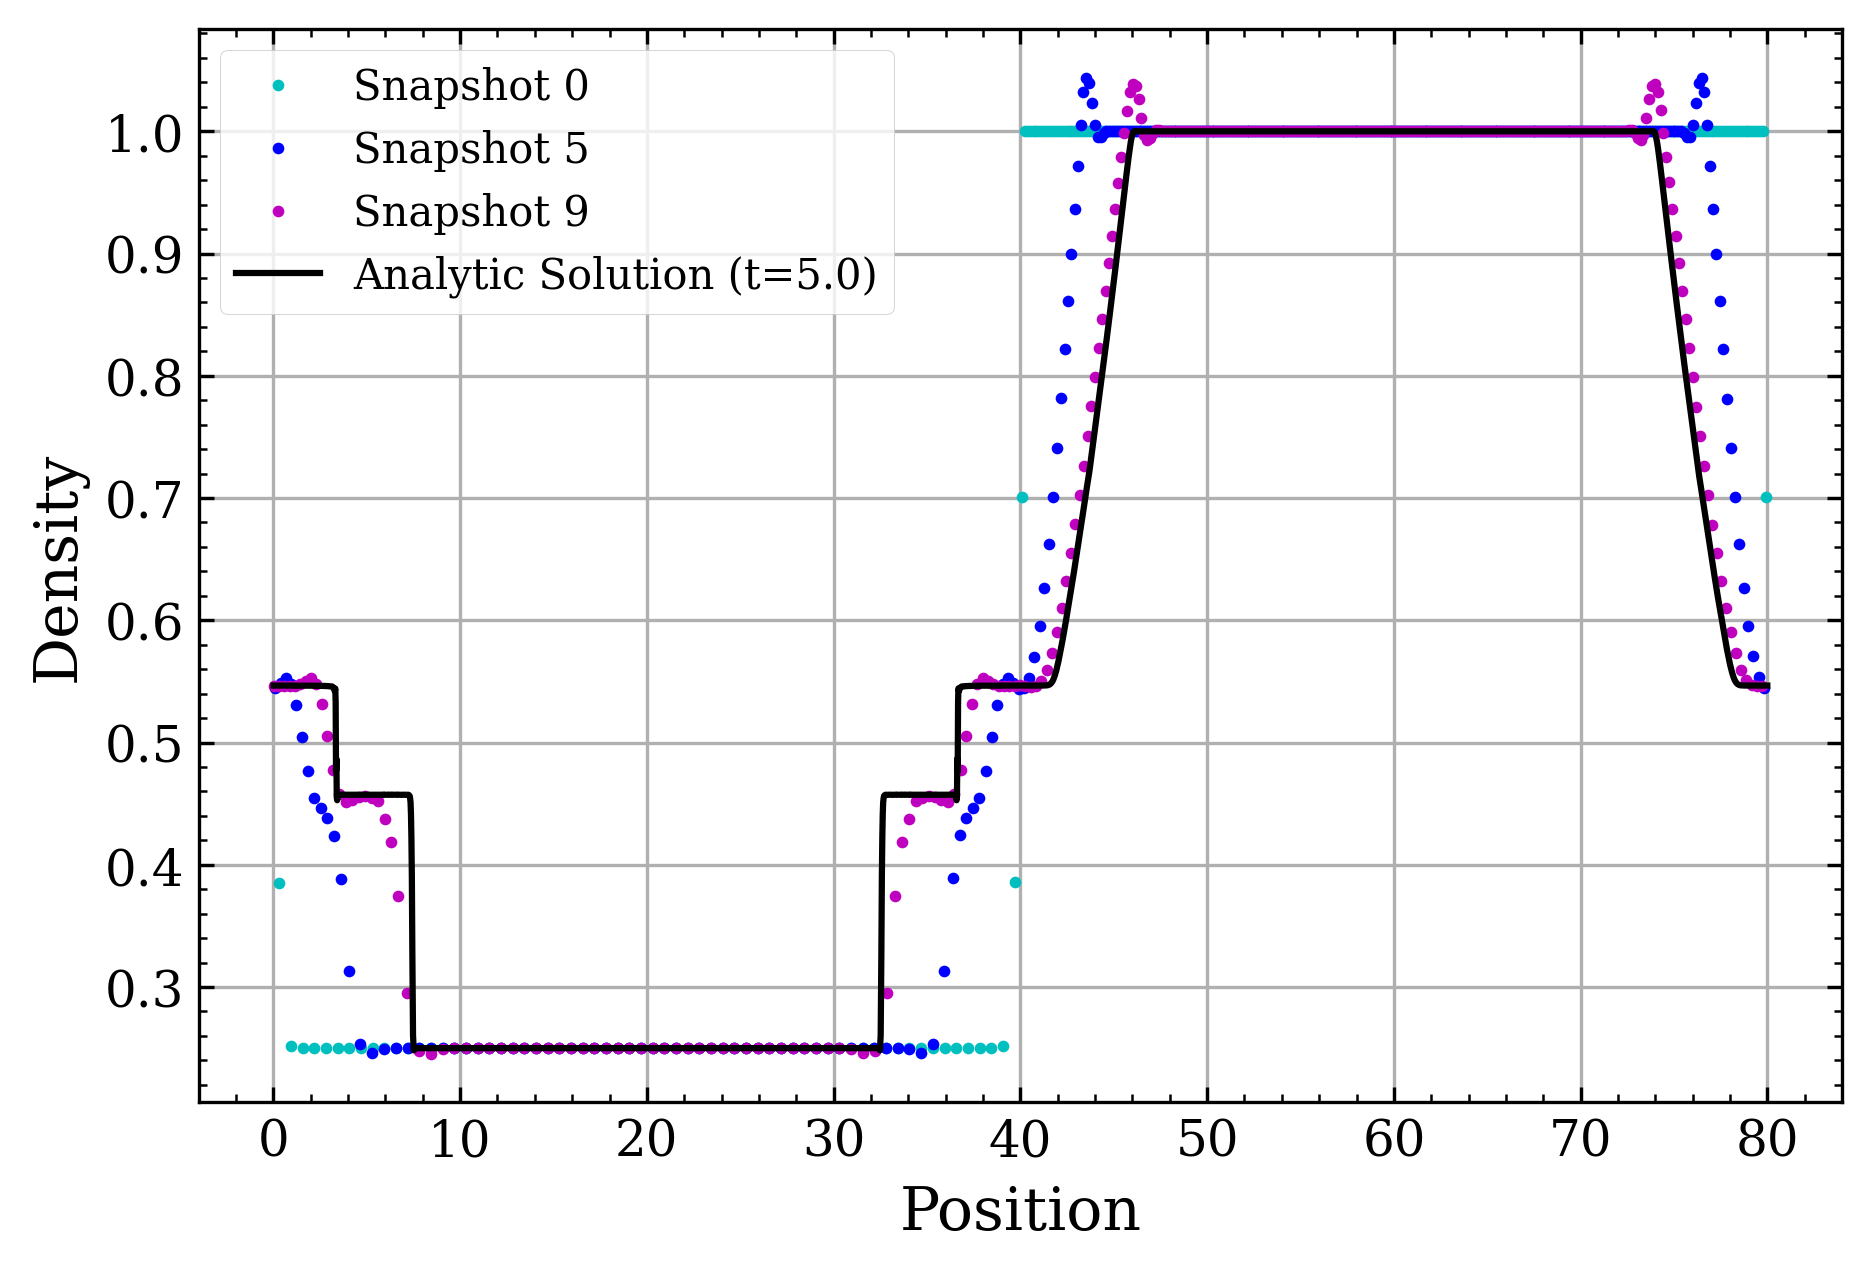

In [47]:
plt.plot(x0.T[0],rho0,'c.',label='Snapshot 0')
plt.plot(x5.T[0],rho5,'b.',label='Snapshot 5')
plt.plot(x9.T[0],rho9,'m.',label='Snapshot 9')
plt.plot(exact['x'],exact['density'],'k-',label='Analytic Solution (t=5.0)')
plt.xlabel('Position')
plt.ylabel('Density')
plt.legend()

c) *But what about magnetic fields?* Choose and run one of the available tests that includes MHD. Make a plot of the resulting magnetic field, e.g., show either the field in one
1
direction such as ’magnetic field x’ or a proxy for the rms magnetic field (such as ('gas', 'magnetic energy'), which is available in yt).

Here I use the MFM method on the MHD blast problem with 4 processors on 1 node.

In [82]:
m1 = h5py.File('mhd_blast/snapshot_001.hdf5', 'r')
m5 = h5py.File('mhd_blast/snapshot_005.hdf5', 'r')
m9 = h5py.File('mhd_blast/snapshot_009.hdf5', 'r')

In [83]:
partdata = m1['PartType0']
for name in partdata:
    print(name)

Coordinates
Density
InternalEnergy
MagneticField
Masses
ParticleChildIDsNumber
ParticleIDGenerationNumber
ParticleIDs
SmoothingLength
Velocities


In [84]:
mx1, my1 = m1['PartType0']['Coordinates'][:].T[0], m1['PartType0']['Coordinates'][:].T[1]
mx5, my5 = m5['PartType0']['Coordinates'][:].T[0], m5['PartType0']['Coordinates'][:].T[1]
mx9, my9 = m9['PartType0']['Coordinates'][:].T[0], m9['PartType0']['Coordinates'][:].T[1]

In [85]:
b1 = m1['PartType0']['MagneticField'][:].T[0]
b5 = m5['PartType0']['MagneticField'][:].T[0]
b9 = m9['PartType0']['MagneticField'][:].T[0]

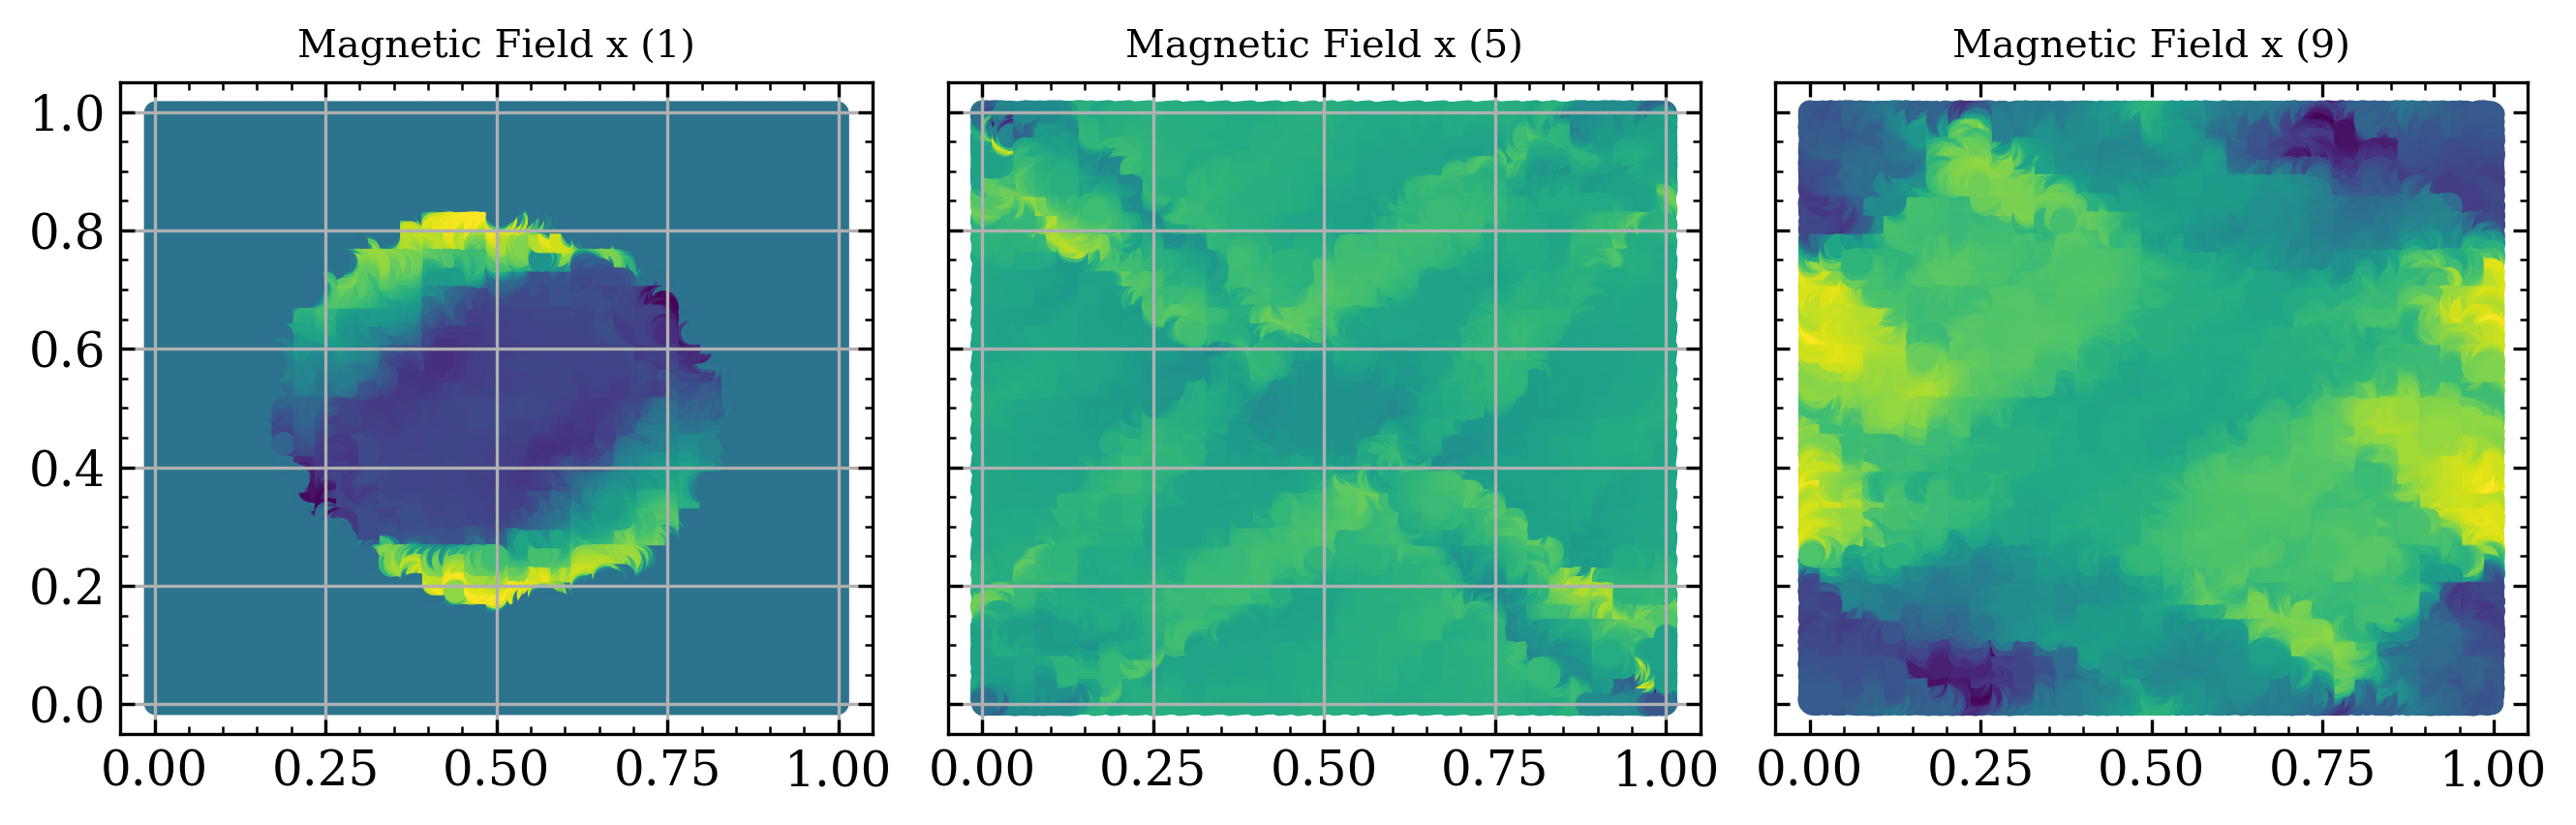

In [100]:
fig, ax = plt.subplots(1, 3, figsize = (9,3),sharey=True,sharex=True)
plt.grid(False)
ax[0].set_title('Magnetic Field x (1)')
ax[0].scatter(mx1, my1, c=b1)
ax[1].set_title('Magnetic Field x (5)')
ax[1].scatter(mx5, my5, c=b5)
ax[2].set_title('Magnetic Field x (9)')
ax[2].scatter(mx9, my9, c=b9)

e) *Problems and Comments.* Did you encounter any problems? If so, how did you solve them? Do you have any questions that were not answered by the documentation?

I did encounter some problems with the module loading, but I just ran the line in the GIZMO documentation in the command line in addition to the bashrc file and that worked. It also requires different modules than in the installation guide on canvas but the GIZMO documentation has the correct list of modules to load.

### Problem 3: Sod it! Not again!
Using Make IC.py in the GIZMO scripts directory as a guide (or another of the setup options) generate initial conditions for the Sod shock tube problem we did in HW2. You may either use GIZMO’s MFM solver – in which case make the cell mass uniform in your setup – or the MFV solver — make the cell volume uniform (constant dx spacing).
Run the problem with GIZMO and compare with your result from HW2

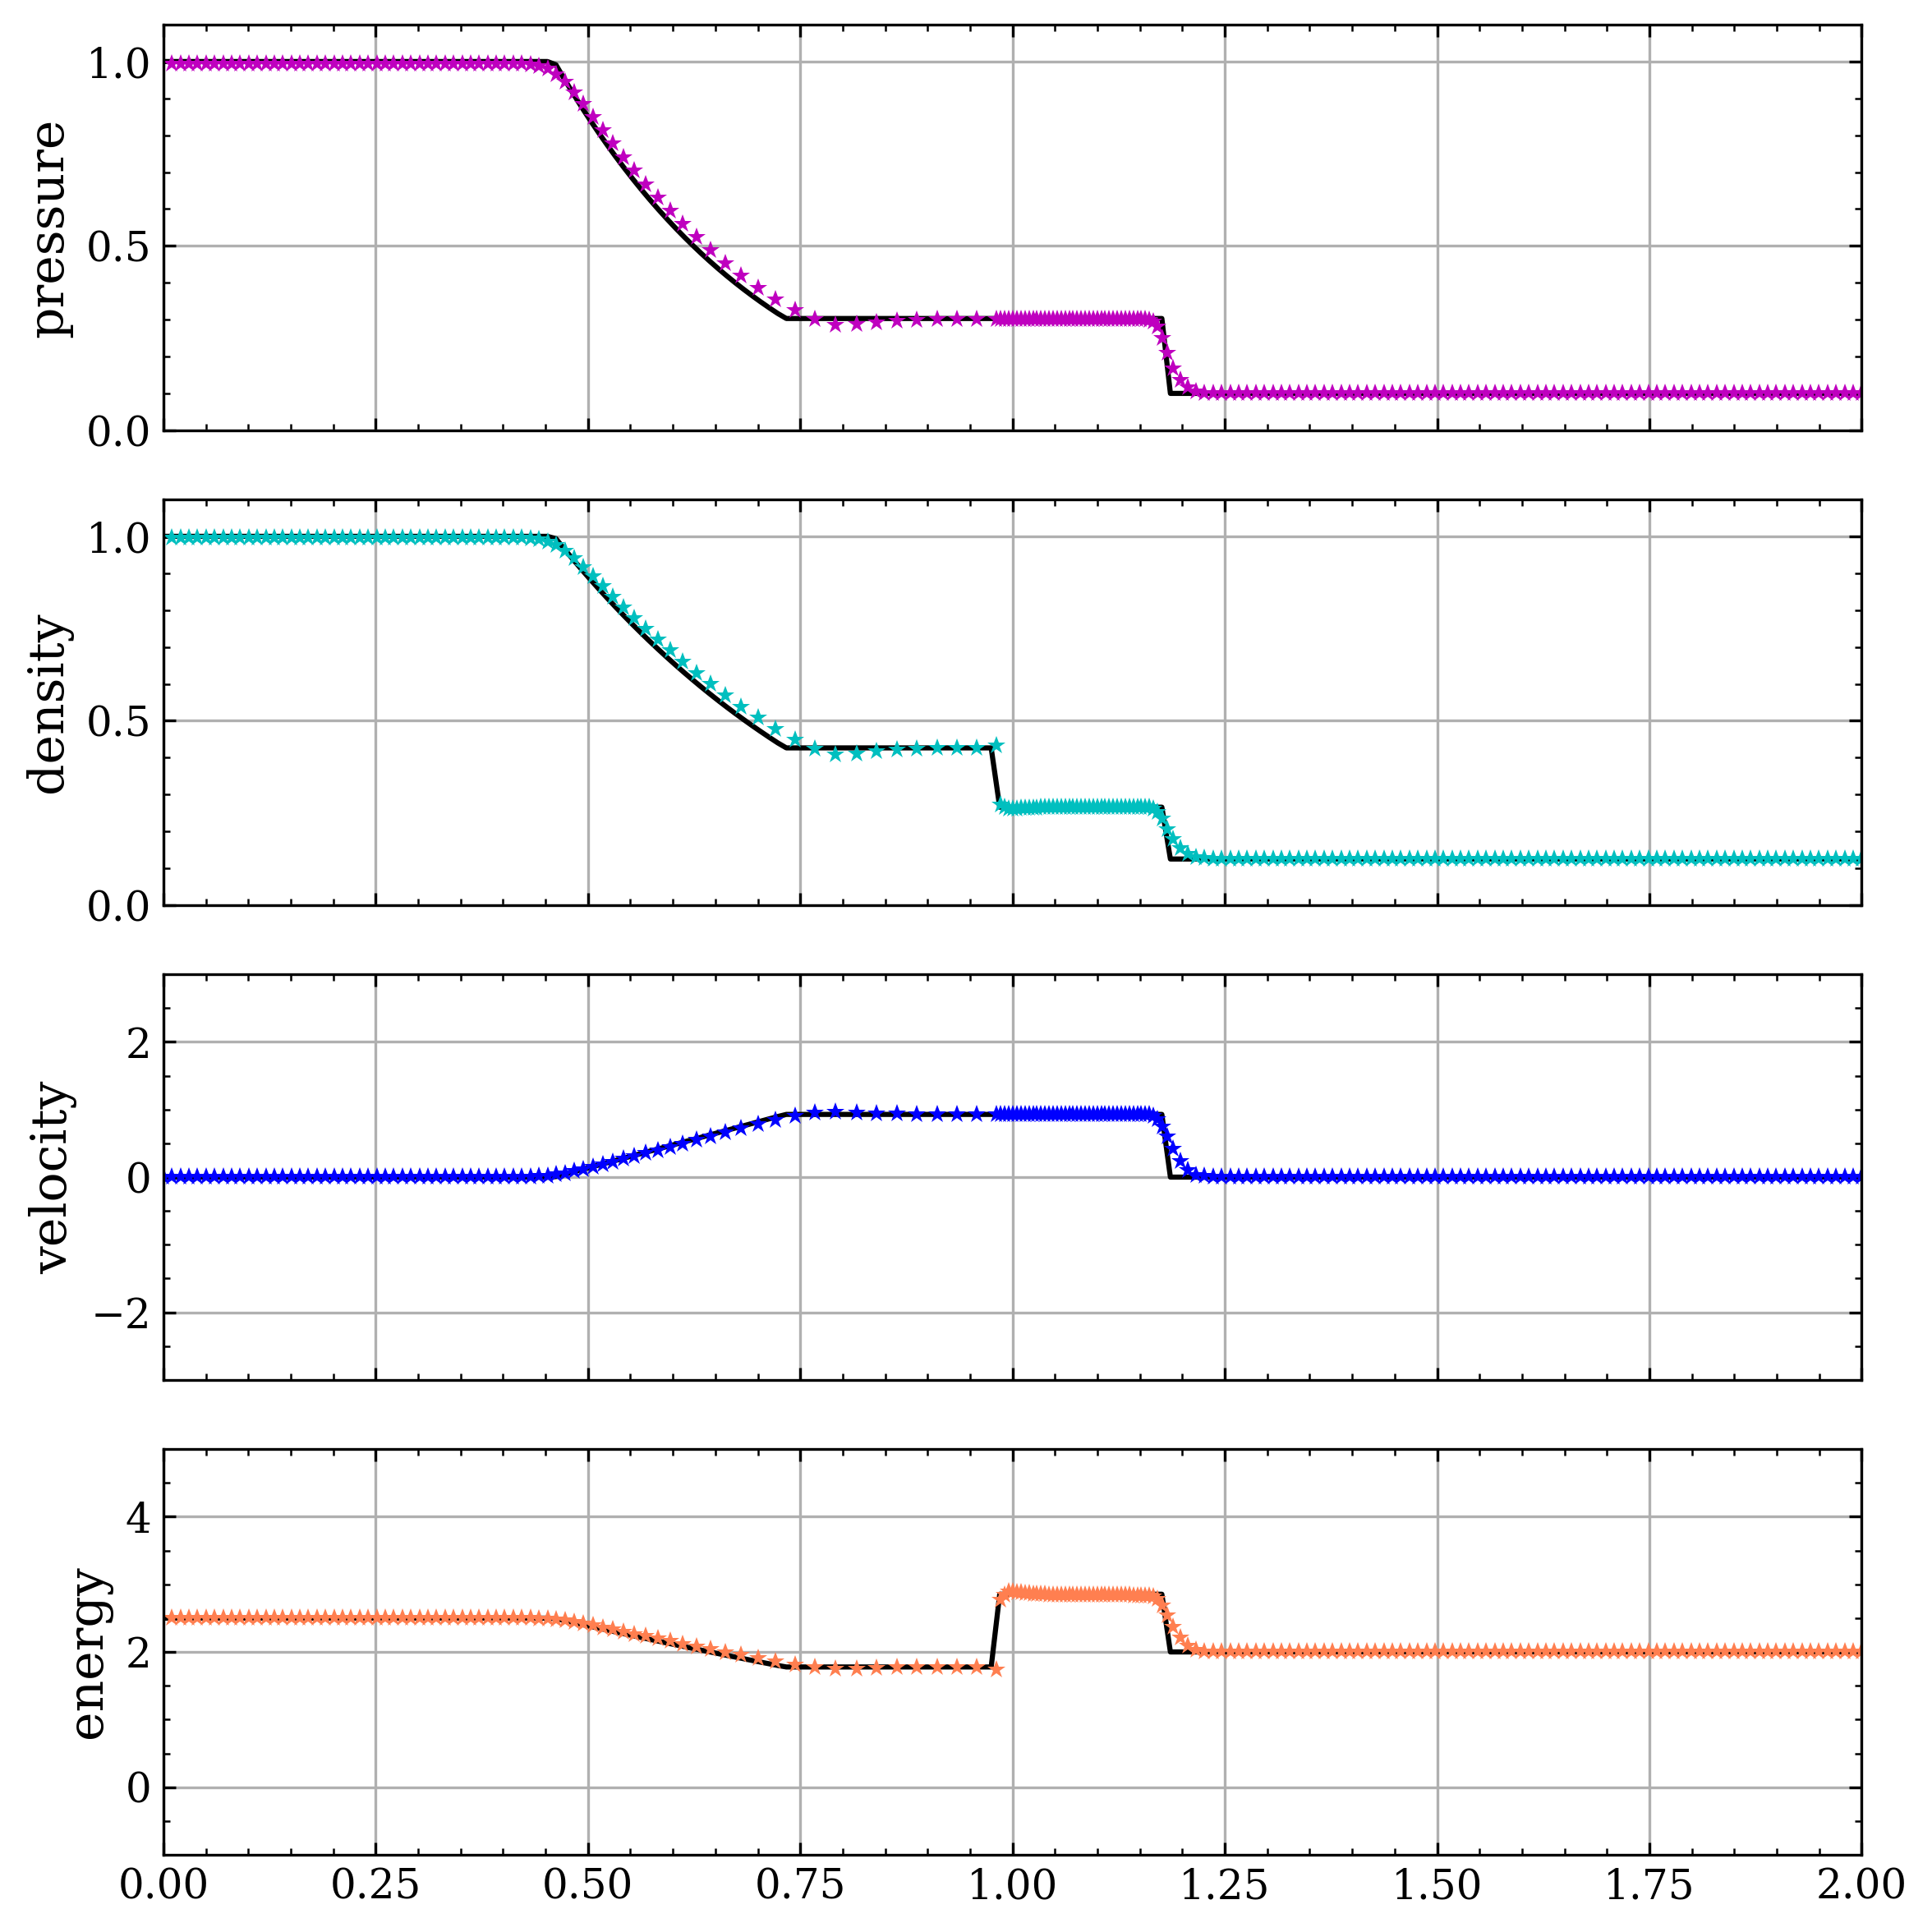

In [107]:
import sod_shock_tube
sod_shock_tube.numerical(N=200,tmax=0.245,verbose=False)